<a href="https://colab.research.google.com/github/mahimalolla/EcoWatt/blob/main/EcoWatt_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn statsmodels fbprophet xgboost tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

In [ ]:
pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
accelerate                            1.6.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.23
albumentations                        2.0.5
ale-py                                0.10.2
altair                                5.5.0
annotated-types                       0.7.0
anyio                                 4.9.0
argon2-cffi                           23.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.1
arviz                                 0.21.0
astropy                               7.0.1
astropy-iers-data                     0.2025.4.21.0.37.6
astunparse                            1.6.3
atpublic                              5.1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/household_power_consumption.csv', sep=';', low_memory=False)

# Displaying the first few rows
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


Data Preprocessing

In [ ]:
# Combining 'Date' and 'Time' columns into a single 'DateTime' column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Setting 'DateTime' as the index
df.set_index('DateTime', inplace=True)

# Dropping the original 'Date' and 'Time' columns as they are no longer needed
df.drop(columns=['Date', 'Time'], inplace=True)

# Displaying the first few rows to verify
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
#Checking for missing values
df.isnull().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [ ]:
df.ffill(inplace=True)
df.isnull().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


**Feature Engineering**

In [ ]:
print(df.dtypes)

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object


In [ ]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df_resampled = df.resample('H').mean()
df_resampled.head()

<ipython-input-44-1756d5f93113>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('H').mean()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [ ]:
# Extract hour of the day from the DateTime index
df_resampled['hour'] = df_resampled.index.hour

# Extract day of the week (0 = Monday, 6 = Sunday)
df_resampled['day_of_week'] = df_resampled.index.dayofweek

# Weekend indicator (1 = weekend, 0 = weekday)
df_resampled['is_weekend'] = df_resampled['day_of_week'].isin([5, 6]).astype(int)

# Extract month (1-12)
df_resampled['month'] = df_resampled.index.month

# Extract year (optional, if the dataset spans multiple years)
df_resampled['year'] = df_resampled.index.year

# 7-day rolling average of Global Active Power
df_resampled['rolling_avg_7_days'] = df_resampled['Global_active_power'].rolling(window=7).mean()

# Lag features (previous hours' consumption)
df_resampled['lag_1'] = df_resampled['Global_active_power'].shift(1)
df_resampled['lag_2'] = df_resampled['Global_active_power'].shift(2)

# Peak vs. off-peak indicator (1 = peak hour, 0 = off-peak hour)
df_resampled['is_peak'] = df_resampled['hour'].apply(lambda x: 1 if (6 <= x <= 9) or (17 <= x <= 21) else 0)

# Display the first few rows to verify the features
df_resampled.head(8)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day_of_week,is_weekend,month,year,rolling_avg_7_days,lag_1,lag_2,is_peak
DateTime,,,,,,,,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,17,5,1,12,2006,NaN,NaN,NaN,1
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,18,5,1,12,2006,NaN,4.222889,NaN,1
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,19,5,1,12,2006,NaN,3.632200,4.222889,1
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,20,5,1,12,2006,NaN,3.400233,3.632200,1
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,21,5,1,12,2006,NaN,3.268567,3.400233,1
2006-12-16 22:00:00,2.200133,0.056167,238.760000,9.523333,0.0,0.133333,4.433333,22,5,1,12,2006,NaN,3.056467,3.268567,0
2006-12-16 23:00:00,2.061600,0.071433,240.619667,8.896667,0.0,0.083333,0.000000,23,5,1,12,2006,3.120298,2.200133,3.056467,0
2006-12-17 00:00:00,1.882467,0.102433,240.961833,8.126667,0.0,0.466667,0.000000,0,6,1,12,2006,2.785952,2.061600,2.200133,0


### Time Series Analysis

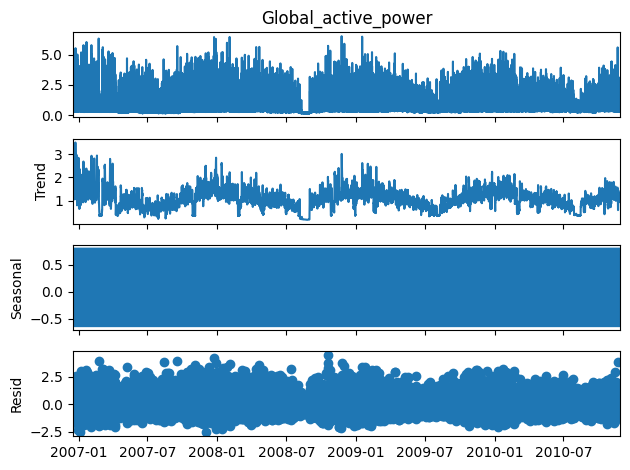

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

# Decompose the time series into trend, seasonal, and residual components
decomposition_a = seasonal_decompose(df_resampled['Global_active_power'], model='additive')
decomposition_a.plot()
pyplot.show()

In [ ]:
print(decomposition_a.trend)
print(decomposition_a.seasonal)
print(decomposition_a.resid)

DateTime
2006-12-16 17:00:00   NaN
2006-12-16 18:00:00   NaN
2006-12-16 19:00:00   NaN
2006-12-16 20:00:00   NaN
2006-12-16 21:00:00   NaN
                       ..
2010-11-26 17:00:00   NaN
2010-11-26 18:00:00   NaN
2010-11-26 19:00:00   NaN
2010-11-26 20:00:00   NaN
2010-11-26 21:00:00   NaN
Freq: h, Name: trend, Length: 34589, dtype: float64
DateTime
2006-12-16 17:00:00   -0.037046
2006-12-16 18:00:00    0.230659
2006-12-16 19:00:00    0.634120
2006-12-16 20:00:00    0.799301
2006-12-16 21:00:00    0.777557
                         ...   
2010-11-26 17:00:00   -0.037046
2010-11-26 18:00:00    0.230659
2010-11-26 19:00:00    0.634120
2010-11-26 20:00:00    0.799301
2010-11-26 21:00:00    0.777557
Freq: h, Name: seasonal, Length: 34589, dtype: float64
DateTime
2006-12-16 17:00:00   NaN
2006-12-16 18:00:00   NaN
2006-12-16 19:00:00   NaN
2006-12-16 20:00:00   NaN
2006-12-16 21:00:00   NaN
                       ..
2010-11-26 17:00:00   NaN
2010-11-26 18:00:00   NaN
2010-11-26 19:00:00 

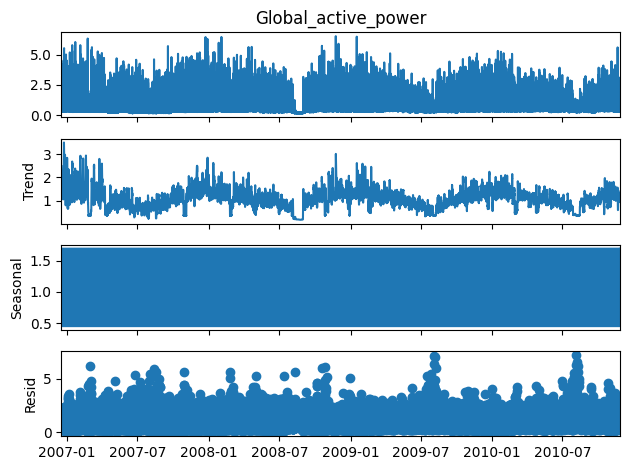

In [ ]:
decomposition_m = seasonal_decompose(df_resampled['Global_active_power'], model='multiplicative')
decomposition_m.plot()
pyplot.show()

In [ ]:
print(decomposition_m.trend)
print(decomposition_m.seasonal)
print(decomposition_m.resid)

DateTime
2006-12-16 17:00:00   NaN
2006-12-16 18:00:00   NaN
2006-12-16 19:00:00   NaN
2006-12-16 20:00:00   NaN
2006-12-16 21:00:00   NaN
                       ..
2010-11-26 17:00:00   NaN
2010-11-26 18:00:00   NaN
2010-11-26 19:00:00   NaN
2010-11-26 20:00:00   NaN
2010-11-26 21:00:00   NaN
Freq: h, Name: trend, Length: 34589, dtype: float64
DateTime
2006-12-16 17:00:00    0.936202
2006-12-16 18:00:00    1.156285
2006-12-16 19:00:00    1.517170
2006-12-16 20:00:00    1.685545
2006-12-16 21:00:00    1.694951
                         ...   
2010-11-26 17:00:00    0.936202
2010-11-26 18:00:00    1.156285
2010-11-26 19:00:00    1.517170
2010-11-26 20:00:00    1.685545
2010-11-26 21:00:00    1.694951
Freq: h, Name: seasonal, Length: 34589, dtype: float64
DateTime
2006-12-16 17:00:00   NaN
2006-12-16 18:00:00   NaN
2006-12-16 19:00:00   NaN
2006-12-16 20:00:00   NaN
2006-12-16 21:00:00   NaN
                       ..
2010-11-26 17:00:00   NaN
2010-11-26 18:00:00   NaN
2010-11-26 19:00:00 

In [ ]:
df_resampled.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'hour', 'day_of_week', 'is_weekend', 'month', 'year',
       'rolling_avg_7_days', 'lag_1', 'lag_2', 'is_peak'],
      dtype='object')

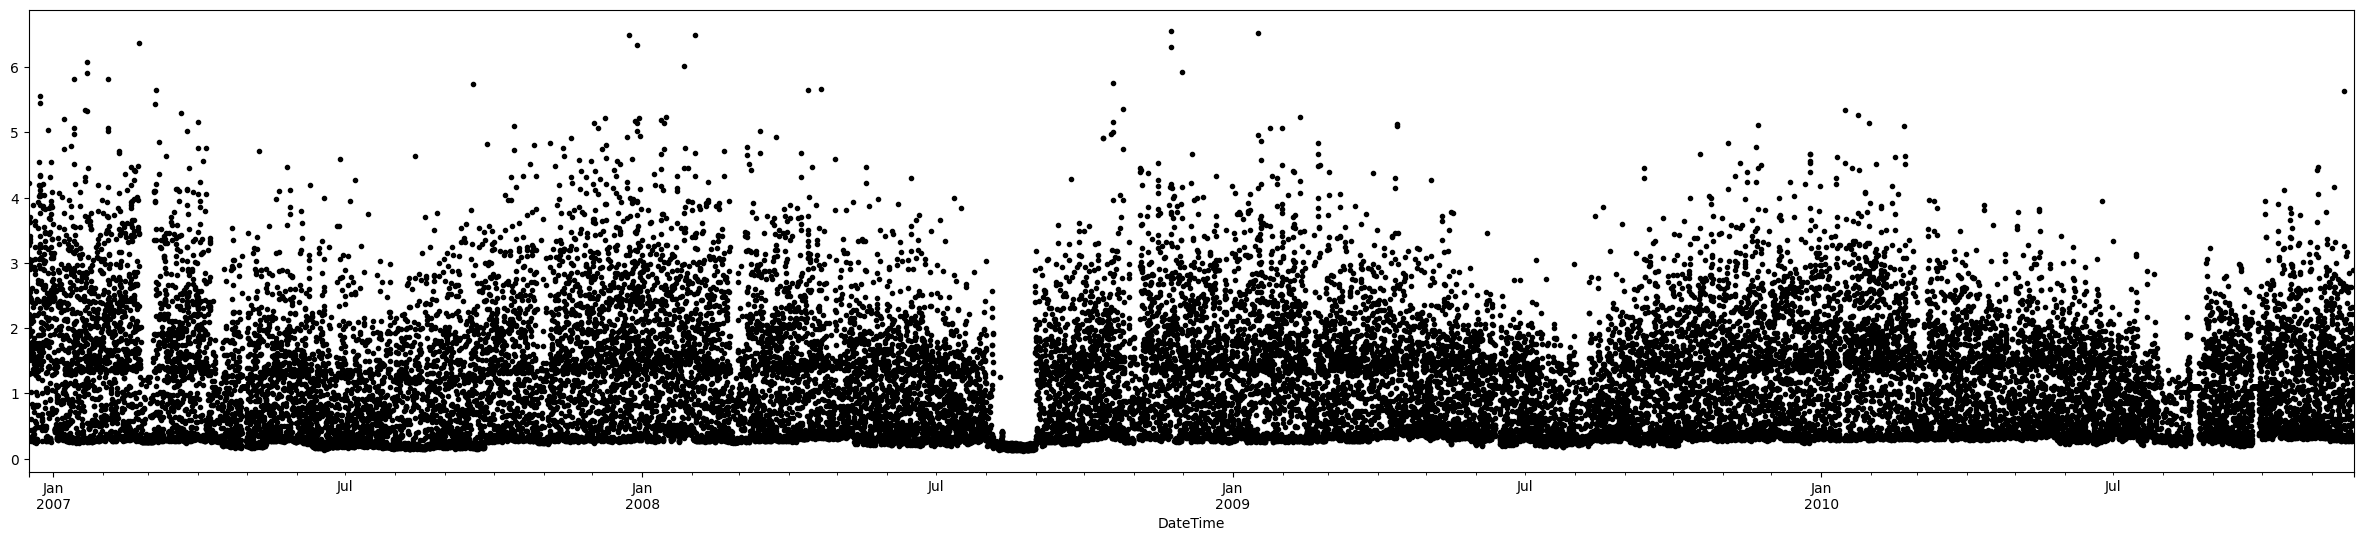

In [ ]:
df_resampled['Global_active_power'].plot(style='k.', figsize = (30, 6))
pyplot.show()

<ipython-input-52-3f1a5a3b9050>:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index=pd.date_range(start=name, periods=len(group), freq='H'),
<ipython-input-52-3f1a5a3b9050>:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index=pd.date_range(start=name, periods=len(group), freq='H'),
<ipython-input-52-3f1a5a3b9050>:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index=pd.date_range(start=name, periods=len(group), freq='H'),
<ipython-input-52-3f1a5a3b9050>:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index=pd.date_range(start=name, periods=len(group), freq='H'),
<ipython-input-52-3f1a5a3b9050>:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index=pd.date_range(start=name, periods=len(group), freq='H'),


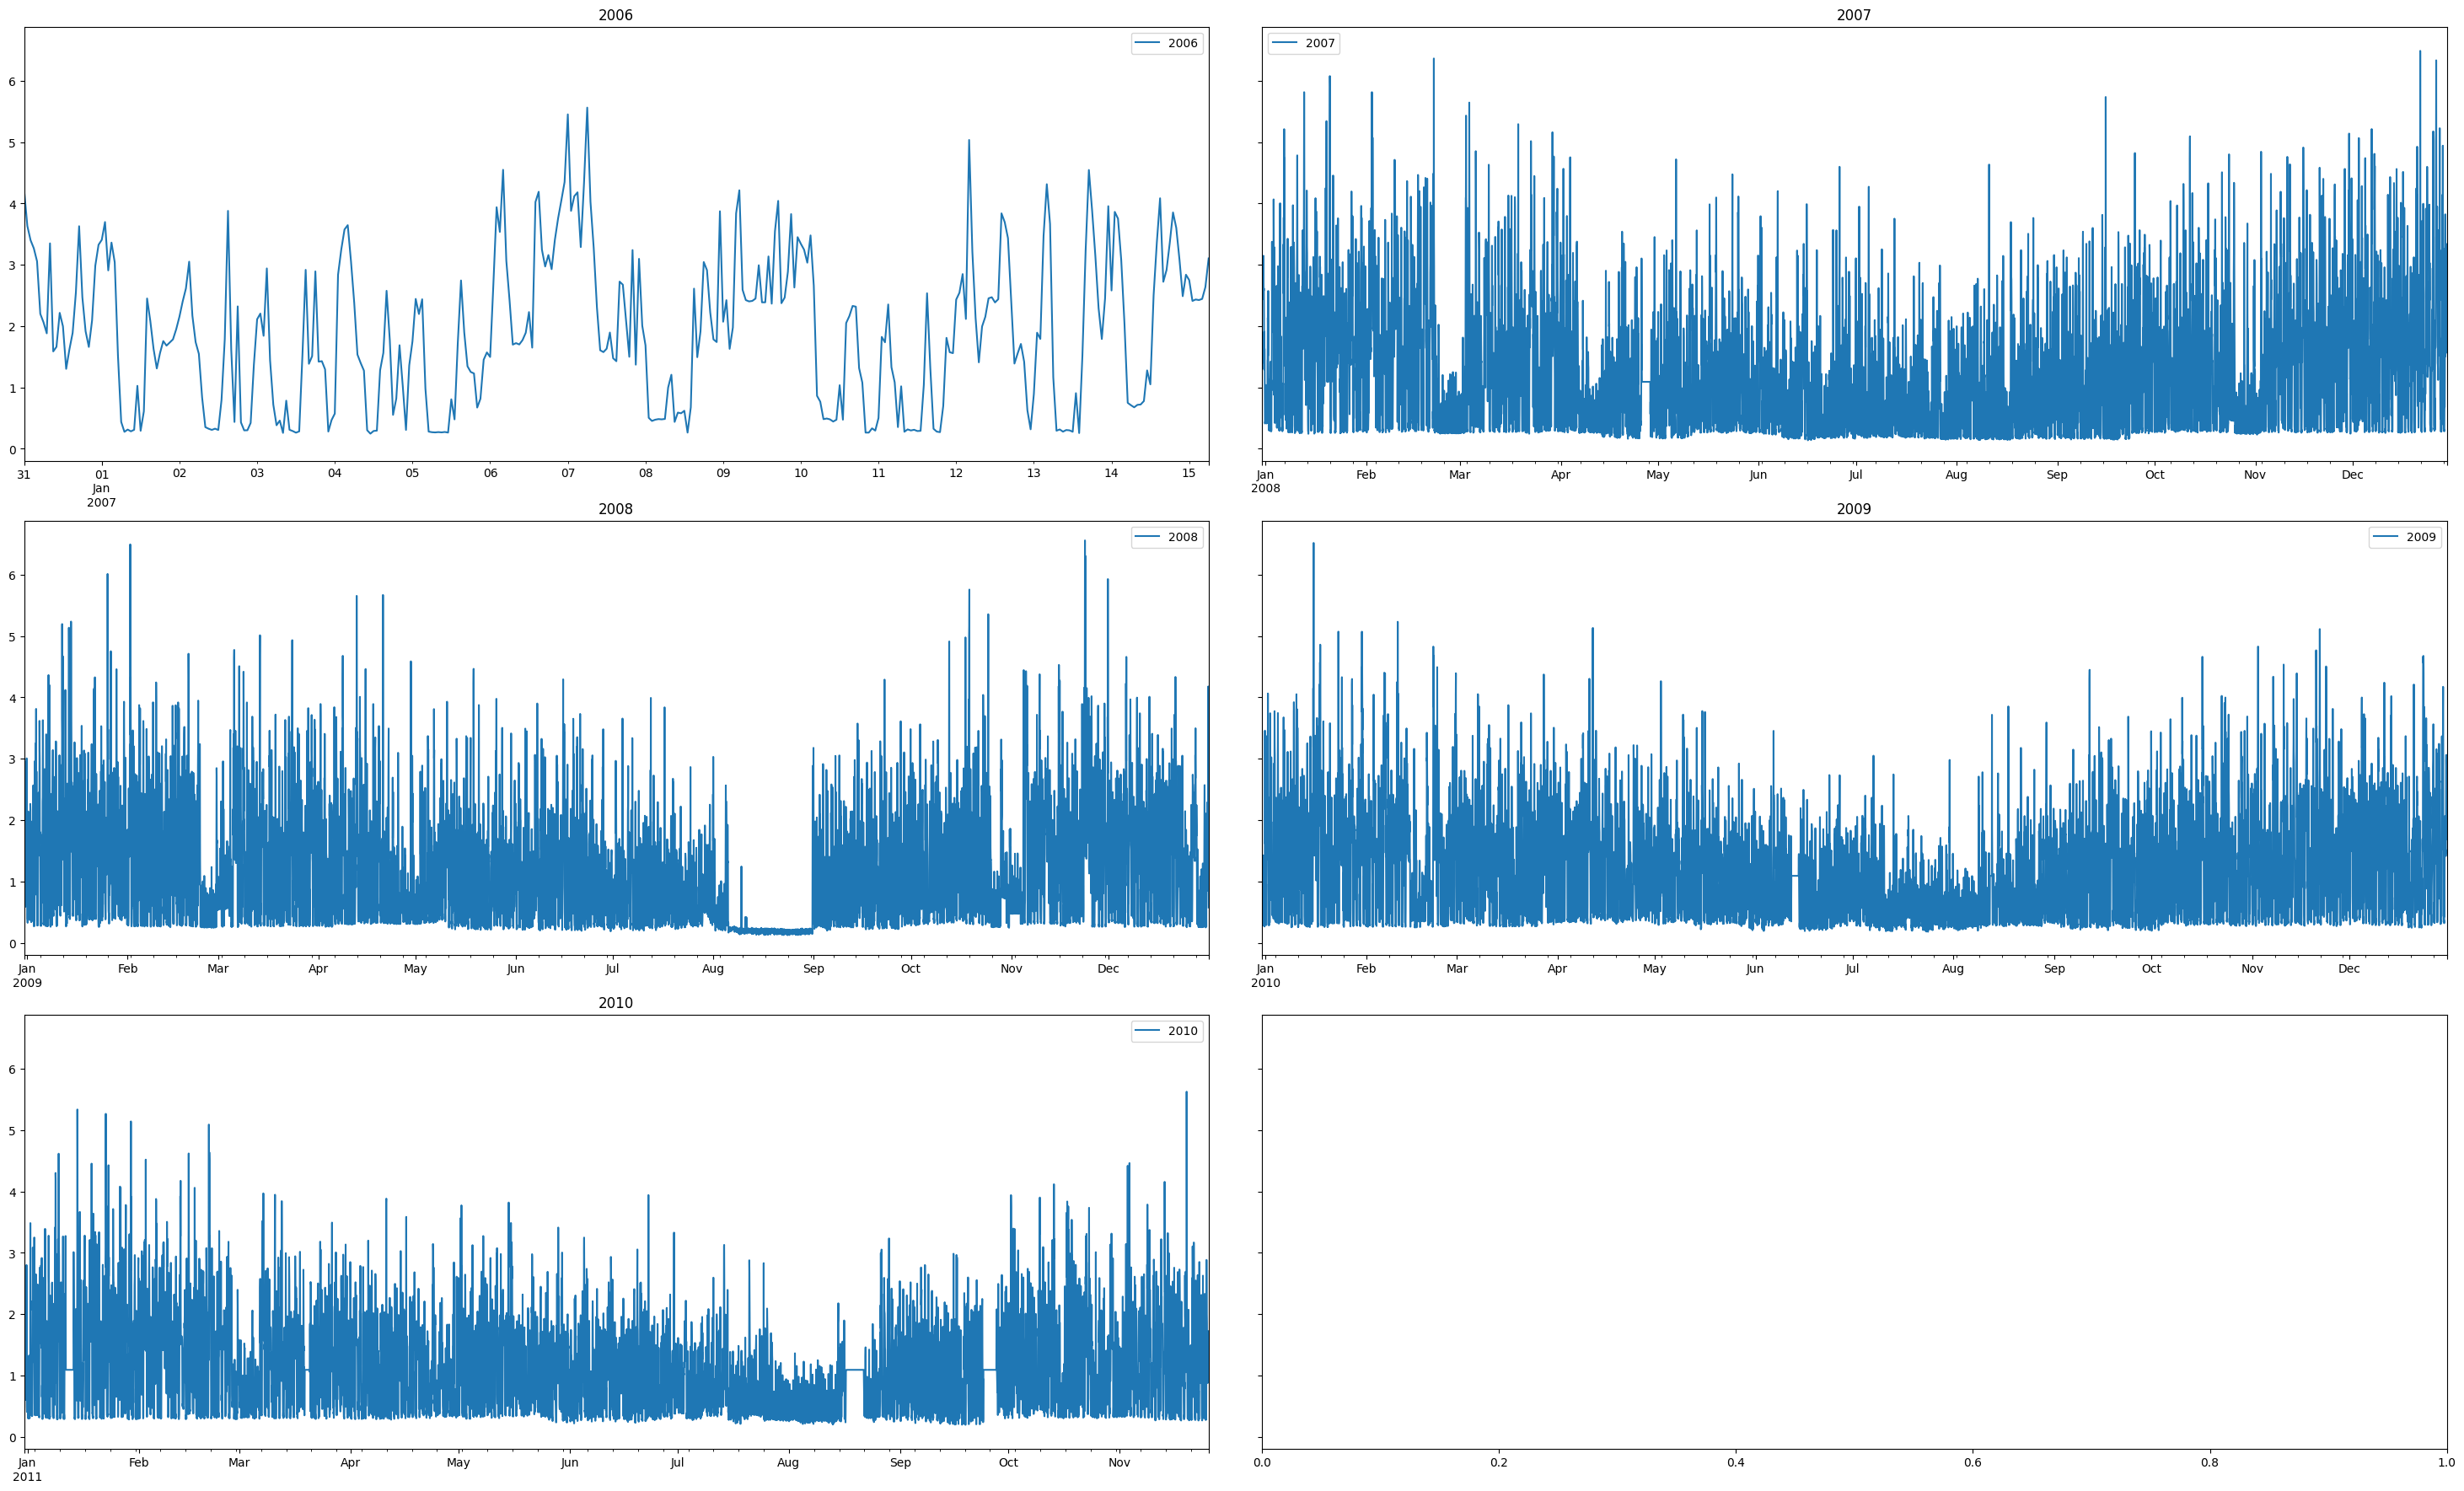

In [ ]:
from pandas import Grouper, DataFrame
import matplotlib.pyplot as plt

groups = df_resampled.groupby(Grouper(freq='YE'))
years = DataFrame()

# Calculate the number of rows and columns for subplots
num_years = len(groups)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_years + num_cols - 1) // num_cols

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 6 * num_rows), sharey=True)
fig.tight_layout(pad=3.0)  # Adjust padding between subplots

# Iterate through groups and plot on subplots
year_index = 0
for name, group in groups:
    # Calculate subplot row and column
    row = year_index // num_cols
    col = year_index % num_cols

    # Create a new DataFrame for the current year with an hourly index
    year_df = DataFrame(group['Global_active_power'].values,
                       index=pd.date_range(start=name, periods=len(group), freq='H'),
                       columns=[name.year])

    # Plot on the current subplot
    year_df.plot(ax=axes[row, col], title=name.year)

    year_index += 1

plt.show()

'''In the data, there is only one month's data available. Due to this reason, the hourly data available throughout
that month is plotted in the 2006 year plot. '''

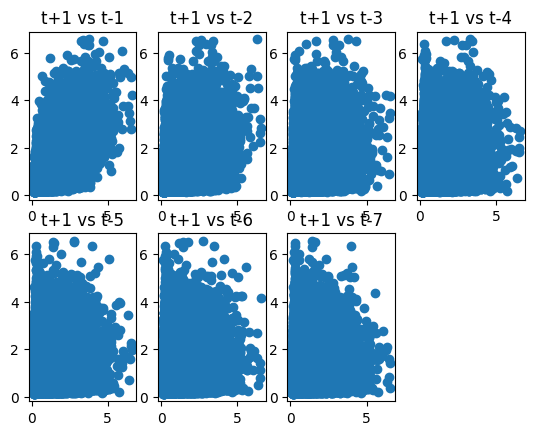

In [ ]:
from pandas import concat
values = DataFrame(df_resampled['Global_active_power'].values)
lags = 7
columns = [values]

for i in range(1, lags + 1):
    columns.append(values.shift(i))
dataframe = concat(columns, axis = 1)
columns = ['t+1']
for i in range(1, lags + 1):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
	ax = pyplot.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()
'''Positive correlation, as the point clusters are from bottom left to top right'''

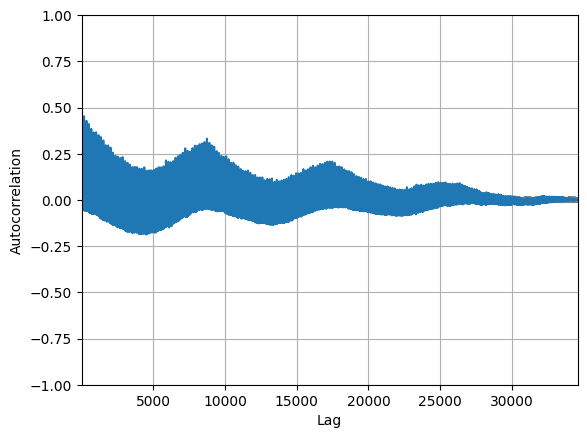

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_resampled['Global_active_power'])
pyplot.show()
'''A seasonality is clearly seen with the positive and negative sine waves over the lags'''